In [1]:
# Install rdkit
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 42.4 MB/s eta 0:00:00


## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



In [2]:
from rdkit import Chem

# Create the paracetamol molecule from its SMILES
smiles = "CC(=O)NC1=CC=C(O)C=C1"
paracetamol = Chem.MolFromSmiles(smiles)

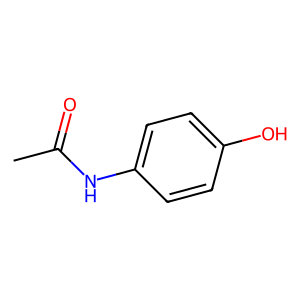

In [3]:
from rdkit.Chem import Draw

# Visualize its structure
Draw.MolToImage(paracetamol)

In [4]:
# Print the number of atoms
num_atoms = paracetamol.GetNumAtoms()
print(f"The number of atoms in the molecule is {num_atoms}.")


The number of atoms in the molecule is 11.


In [5]:
# Print the list of atoms
atoms = [atom.GetSymbol() for atom in paracetamol.GetAtoms()]
print(f"The list of atoms in the molecule is {atoms}.")


The list of atoms in the molecule is ['C', 'C', 'O', 'N', 'C', 'C', 'C', 'C', 'O', 'C', 'C'].


In [6]:
# Find the number of bonds
num_bonds = paracetamol.GetNumBonds()
print(f"The number of bonds in the molecule is {num_bonds}.")

The number of bonds in the molecule is 11.


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf".


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [7]:
!wget -O /content/DB00295.sdf https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf

--2023-09-08 08:05:42--  https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf
Resolving go.drugbank.com (go.drugbank.com)... 172.66.41.6, 172.66.42.250, 2606:4700:3108::ac42:2afa, ...
Connecting to go.drugbank.com (go.drugbank.com)|172.66.41.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘/content/DB00295.sdf’

/content/DB00295.sd     [ <=>                ]   7.38K  --.-KB/s    in 0s      

2023-09-08 08:05:43 (49.8 MB/s) - ‘/content/DB00295.sdf’ saved [7559]



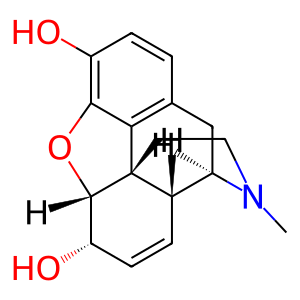

In [8]:
supplier = Chem.SDMolSupplier('/content/DB00295.sdf')
molecules = [mol for mol in supplier if mol is not None]

# If the SDF contains a single molecule, you can simply use
morphine = molecules[0]
Draw.MolToImage(morphine)

In [9]:
from rdkit.Chem import AllChem

# Compute its fingerprint as a bit vector
radius = 2
nBits = 1024
fp = AllChem.GetMorganFingerprintAsBitVect(morphine, radius, nBits=nBits)

## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [10]:
import numpy as np
from rdkit import DataStructs
nBits = 1024
fp_paracetamol = AllChem.GetMorganFingerprintAsBitVect(paracetamol, 2, nBits=nBits)

arr_paracetamol = np.zeros((1,), np.int8)
DataStructs.ConvertToNumpyArray(fp_paracetamol, arr_paracetamol)
nonzero_elements_paracetamol = np.nonzero(arr_paracetamol)

print("Non-zero elements in Paracetamol fingerprint:", nonzero_elements_paracetamol)

Non-zero elements in Paracetamol fingerprint: (array([  33,   53,  128,  191,  245,  289,  356,  530,  578,  650,  726,
        745,  754,  792,  807,  843,  849,  893, 1017]),)


In [11]:
smiles_aspirin = "CC(=O)NC1=CC=C(O)C=C1"
aspirin = Chem.MolFromSmiles(smiles_aspirin)

# Compute its fingerprint as a bit vector
fp_aspirin = AllChem.GetMorganFingerprintAsBitVect(aspirin, 2, nBits=nBits)

# Convert the fingerprint to a NumPy array
arr_aspirin = np.zeros((1,), np.int8)
DataStructs.ConvertToNumpyArray(fp_aspirin, arr_aspirin)
nonzero_elements_aspirin = np.nonzero(arr_aspirin)

print("Non-zero elements in Aspirin fingerprint:", nonzero_elements_aspirin)

Non-zero elements in Aspirin fingerprint: (array([  33,   53,  128,  191,  245,  289,  356,  530,  578,  650,  726,
        745,  754,  792,  807,  843,  849,  893, 1017]),)


In [12]:
# Compute the Dice similarity between the two fingerprints
similarity = DataStructs.DiceSimilarity(fp_paracetamol, fp_aspirin)

print("Dice Similarity between Paracetamol and Aspirin:", similarity)

Dice Similarity between Paracetamol and Aspirin: 1.0


Dice similarity to one imply perfect match

## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [13]:
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

descriptor_names = [x[0] for x in Descriptors._descList]

# Initialize the MolecularDescriptorCalculator with the list of descriptor names
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

# Compute the descriptors for Paracetamol
descriptors = calculator.CalcDescriptors(paracetamol)

# Pairing descriptor names with their values
descriptor_values = dict(zip(descriptor_names, descriptors))

print("Computed Descriptors for Paracetamol:")
for desc, value in descriptor_values.items():
    print(f"{desc}: {value}")

Computed Descriptors for Paracetamol:
MaxEStateIndex: 10.524468537414966
MinEStateIndex: -0.11510204081632636
MaxAbsEStateIndex: 10.524468537414966
MinAbsEStateIndex: 0.11510204081632636
qed: 0.5950261967780849
MolWt: 151.165
HeavyAtomMolWt: 142.093
ExactMolWt: 151.063328528
NumValenceElectrons: 58
NumRadicalElectrons: 0
MaxPartialCharge: 0.22074743631242583
MinPartialCharge: -0.5079643157925783
MaxAbsPartialCharge: 0.5079643157925783
MinAbsPartialCharge: 0.22074743631242583
FpDensityMorgan1: 1.3636363636363635
FpDensityMorgan2: 1.9090909090909092
FpDensityMorgan3: 2.3636363636363638
BCUT2D_MWHI: 16.25468871437965
BCUT2D_MWLOW: 10.280190859964755
BCUT2D_CHGHI: 1.9280360590359866
BCUT2D_CHGLO: -1.9945540738765895
BCUT2D_LOGPHI: 2.12524757916018
BCUT2D_LOGPLOW: -2.04401131261029
BCUT2D_MRHI: 5.88095478459792
BCUT2D_MRLOW: -0.11373578338266109
BalabanJ: 2.7362980721056545
BertzCT: 253.29949758389105
Chi0: 8.267584713501616
Chi0n: 6.164862962722325
Chi0v: 6.164862962722325
Chi1: 5.18154055

## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

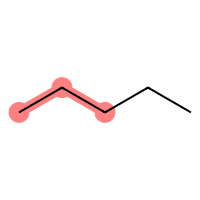

In [14]:
# List of SMILES strings
smiles_list = ["CCCCC","CCOCC","CCNCC","CC(=O)NC1=CC=C(O)C=C1", "CC(=O)NC1=CC=C(O[13CH3])C=C1", "CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1"]
# Create RDKit Mol objects from SMILES strings
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Define the SMARTS pattern for "CCC"
pattern = "CCC"

# Create a SMARTS Mol object
smarts = Chem.MolFromSmarts(pattern)

# Find and highlight substructures
matching_mols = []
for mol in molecules:
    if mol.HasSubstructMatch(smarts):
        matching_mols.append(mol)

# Draw molecules highlighting the substructure
Draw.MolsToGridImage(matching_mols, molsPerRow=1, highlightAtomLists=[mol.GetSubstructMatch(smarts) for mol in matching_mols])


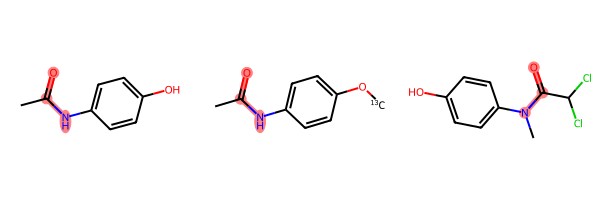

In [15]:
pattern = "C(=O)N"
# Create a SMARTS Mol object
smarts = Chem.MolFromSmarts(pattern)

# Find and highlight substructures
matching_mols = []
for mol in molecules:
    if mol.HasSubstructMatch(smarts):
        matching_mols.append(mol)

# Draw molecules highlighting the substructure
Draw.MolsToGridImage(matching_mols, molsPerRow=3, subImgSize=(200, 200), highlightAtomLists=[mol.GetSubstructMatch(smarts) for mol in matching_mols])


## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [16]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

--2023-09-08 08:05:43--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376487 (1.3M) [text/plain]
Saving to: ‘solubility.train.sdf’

solubility.train.sd 100%[===================>]   1.31M  --.-KB/s    in 0.02s   

2023-09-08 08:05:47 (74.0 MB/s) - ‘solubility.train.sdf’ saved [1376487/1376487]



In [17]:
supplier = Chem.SDMolSupplier("solubility.train.sdf", removeHs=False)
molecule_list = [mol for mol in supplier if mol is not None]
len(molecule_list)

1025

In [18]:
descriptor_names = [x[0] for x in Descriptors._descList]

def calculate_descriptors(mol):
  # Initialize the MolecularDescriptorCalculator with the list of descriptor names
  calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

  # Compute the descriptors for Paracetamol
  descriptors = calculator.CalcDescriptors(mol)
  return dict(zip(descriptor_names, descriptors))

In [19]:
import pandas as pd

df = pd.DataFrame([{**calculate_descriptors(mol)} for mol in molecule_list])
df.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.211806,1.343750,2.211806,1.343750,0.468786,72.151,60.055,72.09390,32,0,...,0,0,0,0,0,0,0,0,0,0
1,1.500000,1.500000,1.500000,1.500000,0.408362,70.135,60.055,70.07825,30,0,...,0,0,0,0,0,0,0,0,0,0
2,2.231806,1.355000,2.231806,1.355000,0.462954,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,1,0
3,2.253472,0.898148,2.253472,0.898148,0.483890,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,0,0
4,2.243056,0.541667,2.243056,0.541667,0.424482,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
labels = [float(mol.GetProp('SOL')) for mol in molecule_list]

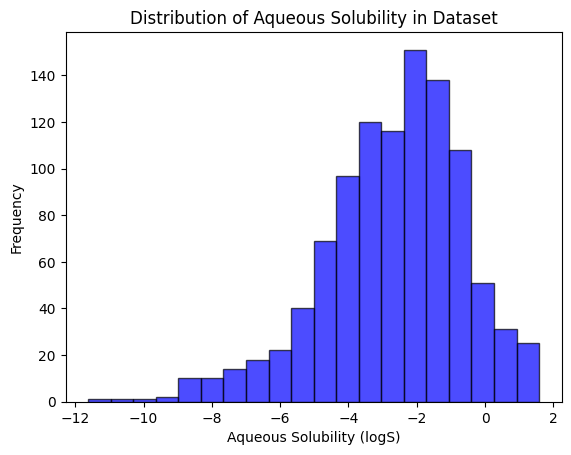

In [21]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(labels, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Aqueous Solubility (logS)')
plt.ylabel('Frequency')
plt.title('Distribution of Aqueous Solubility in Dataset')
plt.show()


## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [22]:
# Check for NaN values in df
nan_rows = df[df.isna().any(axis=1)]

# Count rows with NaN values
print(f"Number of rows with NaN values: {len(nan_rows)}")

# Remove rows with NaN values
if len(nan_rows) > 0:
    df = df.dropna()
    labels = [label for i, label in enumerate(labels) if i not in nan_rows.index]


Number of rows with NaN values: 1


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data
# Create a model and fit it
model = LinearRegression()
model.fit(df_scaled, labels)


LinearRegression()

In [25]:
# Make predictions
y_pred = model.predict(df_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(labels, y_pred))
print(f"Root Mean Square Error: {rmse}")


Root Mean Square Error: 0.5014135455865649


## Ex6.III Prepare data for test  and test model


1. Download file from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf".

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [36]:
# 1. Download the file
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf

--2023-09-08 08:09:06--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245735 (240K) [text/plain]
Saving to: ‘solubility.test.sdf’

solubility.test.sdf 100%[===================>] 239.98K  --.-KB/s    in 0.005s  

2023-09-08 08:09:06 (46.6 MB/s) - ‘solubility.test.sdf’ saved [245735/245735]



In [37]:
supplier_test = Chem.SDMolSupplier("/content/solubility.test.sdf", removeHs=False)
molecule_list_test = [mol for mol in supplier_test if mol is not None]
labels_test = [float(mol.GetProp('SOL')) for mol in molecule_list_test]
df_test = pd.DataFrame([{**calculate_descriptors(mol)} for mol in molecule_list_test])
len(molecule_list_test)

257

In [38]:
# Check for NaN values in df
nan_rows = df_test[df_test.isna().any(axis=1)]

# Count rows with NaN values
print(f"Number of rows with NaN values: {len(nan_rows)}")

# Remove rows with NaN values
if len(nan_rows) > 0:
    df_test = df_test.dropna()
    labels_test = [label for i, label in enumerate(labels_test) if i not in nan_rows.index]

Number of rows with NaN values: 0


In [41]:
df_scaled_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)
df_scaled_test.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.013228,0.882711,0.013228,0.540830,0.446847,0.045926,0.031109,0.046039,0.084112,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.012283,0.873820,0.012283,0.506024,0.466478,0.072722,0.054496,0.072824,0.112150,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.099802,0.914854,0.099802,0.666667,0.388661,0.015279,0.007722,0.015402,0.046729,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012519,0.939475,0.012519,0.763052,0.336737,0.038224,0.031109,0.038335,0.065421,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.094955,0.879976,0.094955,0.530120,0.384696,0.011428,0.007722,0.011550,0.037383,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Make predictions
y_pred = model.predict(df_scaled_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(labels_test, y_pred))
print(f"Root Mean Square Error: {rmse}")


Root Mean Square Error: 60463408248.07149
